<a href="https://colab.research.google.com/github/MuhammadIrfanbio/KS4-_AI-Optimized-Secondary-Structure-of-Aptamer-Against-RdRp-SARS-Cov2-Detection-and-Inhibition/blob/main/KS4_aptamer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies
!pip install biopython tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('/content/aptamers_with_predictions.csv')

# Data Preprocessing
# Convert sequence to one-hot encoding or k-mer based features
def one_hot_encode(sequence):
    """One-hot encode DNA/RNA sequence"""
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'U': [0, 0, 0, 1]}
# Install dependencies
!pip install biopython tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('/content/aptamers_with_predictions.csv')

# Data Preprocessing
# Convert sequence to one-hot encoding or k-mer based features
def one_hot_encode(sequence):
    """One-hot encode DNA/RNA sequence"""
    # Updated base_map for both DNA and RNA sequences, including 'N' as a vector of zeros
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'U': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}

    # Ensure the sequence is processed correctly (handle RNA/U as T)
    return [base_map.get(base, [0, 0, 0, 0]) for base in sequence]  # Default to zeros if base is not in base_map

# Apply one-hot encoding to sequences
sequences = df['Sequence'].apply(lambda x: one_hot_encode(x)).tolist()

# Padding sequences to make them of equal length
max_seq_len = max([len(seq) for seq in sequences])  # You can adjust this value based on your data
sequences_pad = pad_sequences(sequences, maxlen=max_seq_len, padding='post', dtype='float32')

# Scale the stability scores
scaler = StandardScaler()
stability_scores = scaler.fit_transform(df['Stability_Score'].values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_pad, stability_scores, test_size=0.2, random_state=42)

# Model Building
model = Sequential()

# Embedding layer (optional)
model.add(Embedding(input_dim=4, output_dim=64, input_length=max_seq_len))

# LSTM layer for sequence learning
model.add(LSTM(128, return_sequences=False, dropout=0.2))

# Dense layer for prediction
model.add(Dense(64, activation='relu'))

# Output layer (predicting stability score)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Generate new aptamers with customized motif
def generate_aptamer(motif="TTTATAACTTAAT", loop_size=30, stem_size=25, gc_content=0.6):
    """
    Generate a new aptamer with custom motif and GC-rich stem.
    """
    # Add the motif to the loop
    aptamer_sequence = motif

    # Generate a random GC-rich stem based on gc_content
    stem_sequence = ''.join(['G' if np.random.rand() < gc_content else 'C' for _ in range(stem_size)])

    # Combine stem and motif to form the aptamer
    aptamer_sequence = stem_sequence + aptamer_sequence + stem_sequence[::-1]

    # Predict the stability score for the generated aptamer
    aptamer_encoded = one_hot_encode(aptamer_sequence)
    aptamer_encoded_pad = pad_sequences([aptamer_encoded], maxlen=max_seq_len, padding='post', dtype='float32')
    predicted_stability = model.predict(aptamer_encoded_pad)

    print(f'Generated Aptamer: {aptamer_sequence}')
    print(f'Predicted Stability Score: {scaler.inverse_transform(predicted_stability)}')

# Example: Generate an aptamer with custom motif and stability score prediction
generate_aptamer(motif="TTTATAACTTAAT", loop_size=30, stem_size=25, gc_content=0.6)
sequences = df['Sequence'].apply(lambda x: one_hot_encode(x)).tolist()

# Padding sequences to make them of equal length
max_seq_len = max([len(seq) for seq in sequences])  # You can adjust this value based on your data
sequences_pad = pad_sequences(sequences, maxlen=max_seq_len, padding='post', dtype='float32')

# Scale the stability scores
scaler = StandardScaler()
stability_scores = scaler.fit_transform(df['Stability_Score'].values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_pad, stability_scores, test_size=0.2, random_state=42)

# Model Building
model = Sequential()

# Embedding layer (optional)
model.add(Embedding(input_dim=4, output_dim=64, input_length=max_seq_len))

# LSTM layer for sequence learning
model.add(LSTM(128, return_sequences=False, dropout=0.2))

# Dense layer for prediction
model.add(Dense(64, activation='relu'))

# Output layer (predicting stability score)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Generate new aptamers with customized motif
def generate_aptamer(motif="TTTATAACTTAAT", loop_size=30, stem_size=25, gc_content=0.6):
    """
    Generate a new aptamer with custom motif and GC-rich stem.
    """
    # Add the motif to the loop
    aptamer_sequence = motif

    # Generate a random GC-rich stem based on gc_content
    stem_sequence = ''.join(['G' if np.random.rand() < gc_content else 'C' for _ in range(stem_size)])

    # Combine stem and motif to form the aptamer
    aptamer_sequence = stem_sequence + aptamer_sequence + stem_sequence[::-1]

    # Predict the stability score for the generated aptamer
    aptamer_encoded = one_hot_encode(aptamer_sequence)
    aptamer_encoded_pad = pad_sequences([aptamer_encoded], maxlen=max_seq_len, padding='post', dtype='float32')
    predicted_stability = model.predict(aptamer_encoded_pad)

    print(f'Generated Aptamer: {aptamer_sequence}')
    print(f'Predicted Stability Score: {scaler.inverse_transform(predicted_stability)}')

# Example: Generate an aptamer with custom motif and stability score prediction
generate_aptamer(motif="TTTATAACTTAAT", loop_size=30, stem_size=25, gc_content=0.6)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 274, 4, 64)

In [ ]:
# Install dependencies
!pip install biopython tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('/content/aptamers_with_predictions.csv')

# Data Preprocessing
def one_hot_encode(sequence):
    """One-hot encode DNA/RNA sequence"""
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'U': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}

    # Ensure the sequence is processed correctly (handle RNA/U as T)
    return [base_map.get(base, [0, 0, 0, 0]) for base in sequence]

# Apply one-hot encoding to sequences
sequences = df['Sequence'].apply(lambda x: one_hot_encode(x)).tolist()

# Save the one-hot encoded sequences to CSV
one_hot_df = pd.DataFrame(sequences)
one_hot_df.to_csv('one_hot_encoded_sequences.csv', index=False)
print("One-hot encoded sequences have been saved to 'one_hot_encoded_sequences.csv'.")

# Padding sequences to make them of equal length
max_seq_len = max([len(seq) for seq in sequences])  # Adjust this value based on your data
sequences_pad = pad_sequences(sequences, maxlen=max_seq_len, padding='post', dtype='float32')

# Flatten the padded sequences to a 2D array (each row represents a sequence)
sequences_pad_flattened = sequences_pad.reshape(sequences_pad.shape[0], -1)

# Save padded sequences to CSV after flattening
padded_sequences_df = pd.DataFrame(sequences_pad_flattened)
padded_sequences_df.to_csv('padded_sequences.csv', index=False)
print("Padded sequences have been saved to 'padded_sequences.csv'.")

# Scale the stability scores
scaler = StandardScaler()
stability_scores = scaler.fit_transform(df['Stability_Score'].values.reshape(-1, 1))

# Save the scaled stability scores to CSV
scaled_stability_df = pd.DataFrame(stability_scores, columns=['Scaled Stability Score'])
scaled_stability_df.to_csv('scaled_stability_scores.csv', index=False)
print("Scaled stability scores have been saved to 'scaled_stability_scores.csv'.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_pad, stability_scores, test_size=0.2, random_state=42)

# Save train-test split data to CSV
X_train_df = pd.DataFrame(X_train)
X_train_df.to_csv('X_train.csv', index=False)
X_test_df = pd.DataFrame(X_test)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df = pd.DataFrame(y_train, columns=['Stability Score'])
y_train_df.to_csv('y_train.csv', index=False)
y_test_df = pd.DataFrame(y_test, columns=['Stability Score'])
y_test_df.to_csv('y_test.csv', index=False)
print("Train-test split data has been saved to 'X_train.csv', 'X_test.csv', 'y_train.csv', and 'y_test.csv'.")

# Model Building
model = Sequential()

# LSTM layer for sequence learning (directly take the one-hot encoded input)
model.add(LSTM(128, return_sequences=False, dropout=0.2, input_shape=(max_seq_len, 4)))  # 4 is the number of features (A, C, G, T)

# Dense layer for prediction
model.add(Dense(64, activation='relu'))

# Output layer (predicting stability score)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Save the model's training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)
print("Training history has been saved to 'training_history.csv'.")

# Generate new aptamers with customized motif and varying GC content
def generate_aptamers(motif="TTTATAACTTAAT", loop_size=20, stem_size=10, num_aptamers=50):
    """
    Generate multiple new aptamers with a custom motif and varying GC-rich stem content.
    """
    generated_aptamers = []
    stability_scores = []

    for i in range(num_aptamers):
        # Vary GC content between 40% and 80%
        gc_content = np.random.uniform(0.2, 0.6)  # Random GC content between 40% and 80%

        # Add the motif to the loop
        aptamer_sequence = motif

        # Generate a random GC-rich stem based on gc_content
        stem_sequence = ''.join(['G' if np.random.rand() < gc_content else 'C' for _ in range(stem_size)])

        # Combine stem and motif to form the aptamer
        aptamer_sequence = stem_sequence + aptamer_sequence + stem_sequence[::-1]

        # Predict the stability score for the generated aptamer
        aptamer_encoded = one_hot_encode(aptamer_sequence)
        aptamer_encoded_pad = pad_sequences([aptamer_encoded], maxlen=max_seq_len, padding='post', dtype='float32')
        predicted_stability = model.predict(aptamer_encoded_pad)

        # Store the generated aptamer and its predicted stability
        generated_aptamers.append(aptamer_sequence)
        stability_scores.append(scaler.inverse_transform(predicted_stability))

    # Create DataFrame to save results as CSV
    aptamers_df = pd.DataFrame({
        'Aptamer Sequence': generated_aptamers,
        'Predicted Stability Score': [score[0] for score in stability_scores]
    })

    # Save the results to CSV file
    aptamers_df.to_csv('generated_aptamers.csv', index=False)

    # Print a message indicating that the CSV has been saved
    print("Generated aptamers and their stability scores have been saved to 'generated_aptamers.csv'.")

# Example: Generate 50 aptamers with custom motif and varying GC content
generate_aptamers(motif="TTTATAACTTAAT", loop_size=20, stem_size=10, num_aptamers=50)


One-hot encoded sequences have been saved to 'one_hot_encoded_sequences.csv'.
Padded sequences have been saved to 'padded_sequences.csv'.
Scaled stability scores have been saved to 'scaled_stability_scores.csv'.


ValueError: Must pass 2-d input. shape=(1556, 274, 4)

In [ ]:
# Install necessary libraries
!pip install biopython
!pip install viennarna
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqUtils import GC
import subprocess
import numpy as np

# Load the CSV file with aptamer sequences
df = pd.read_csv('/content/generated_aptamers.csv')

# Define a function to calculate secondary structure and binding free energies using RNAfold (ViennaRNA)
def get_secondary_structure_and_binding_energy(sequence):
    # Run RNAfold to get the secondary structure and binding free energy
    result = subprocess.run(['RNAfold', '--noPS'], input=sequence.encode(), stdout=subprocess.PIPE)
    output = result.stdout.decode('utf-8').splitlines()

    # Extract the secondary structure and free energy
    structure = output[0].split(' ')[1]  # Extract secondary structure
    free_energy = float(output[1].split('=')[1].strip().split(' ')[0])  # Extract free energy

    return structure, free_energy

# Define a function to count the number of stems and loops
def count_stems_and_loops(secondary_structure):
    # A stem is represented by matching pairs, loops are unpaired regions
    stems = secondary_structure.count('(')  # Count opening brackets (paired bases)
    loops = secondary_structure.count('.')  # Count unpaired bases
    return stems, loops

# Add new columns for GC content, secondary structure, free energy, stems, and loops
df['GC_Content'] = df['Aptamer Sequence'].apply(lambda x: GC(x))  # GC content
df['Secondary_Structure'], df['Binding_Free_Energy'] = zip(*df['Aptamer Sequence'].apply(get_secondary_structure_and_binding_energy))
df['Number_of_Stems'], df['Number_of_Loops'] = zip(*df['Secondary_Structure'].apply(count_stems_and_loops))

# Statistical analysis for the new columns
gc_mean = df['GC_Content'].mean()
gc_std = df['GC_Content'].std()

energy_mean = df['Binding_Free_Energy'].mean()
energy_std = df['Binding_Free_Energy'].std()

stems_mean = df['Number_of_Stems'].mean()
loops_mean = df['Number_of_Loops'].mean()

# Print statistical summary
print("GC Content - Mean: {:.2f}, Std Dev: {:.2f}".format(gc_mean, gc_std))
print("Binding Free Energy - Mean: {:.2f} kcal/mol, Std Dev: {:.2f}".format(energy_mean, energy_std))
print("Number of Stems - Mean: {:.2f}, Number of Loops - Mean: {:.2f}".format(stems_mean, loops_mean))

# Save the result to a new CSV file
output_file = '/content/aptamers_with_structure_and_energy.csv'
df.to_csv(output_file, index=False)

# Display the first few rows of the dataframe
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 12.8 MB/s eta 0:00:00


ImportError: cannot import name 'GC' from 'Bio.SeqUtils' (/usr/local/lib/python3.11/dist-packages/Bio/SeqUtils/__init__.py)

In [ ]:
# Install dependencies
!pip install biopython tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('/content/aptamers_with_predictions.csv')

# Data Preprocessing
def one_hot_encode(sequence):
    """One-hot encode DNA/RNA sequence"""
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'U': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}

    # Ensure the sequence is processed correctly (handle RNA/U as T)
    return [base_map.get(base, [0, 0, 0, 0]) for base in sequence]

# Apply one-hot encoding to sequences
sequences = df['Sequence'].apply(lambda x: one_hot_encode(x)).tolist()

# Padding sequences to make them of equal length
max_seq_len = max([len(seq) for seq in sequences])  # Adjust this value based on your data
sequences_pad = pad_sequences(sequences, maxlen=max_seq_len, padding='post', dtype='float32')

# Scale the stability scores
scaler = StandardScaler()
stability_scores = scaler.fit_transform(df['Stability_Score'].values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_pad, stability_scores, test_size=0.2, random_state=42)

# Model Building
model = Sequential()

# LSTM layer for sequence learning (directly take the one-hot encoded input)
model.add(LSTM(128, return_sequences=False, dropout=0.2, input_shape=(max_seq_len, 4)))  # 4 is the number of features (A, C, G, T)

# Dense layer for prediction
model.add(Dense(64, activation='relu'))

# Output layer (predicting stability score)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Generate new aptamers with customized motif
def generate_aptamer(motif="TTTATAACTTAAT", loop_size=30, stem_size=25, gc_content=0.6):
    """
    Generate a new aptamer with custom motif and GC-rich stem.
    """
    # Add the motif to the loop
    aptamer_sequence = motif

    # Generate a random GC-rich stem based on gc_content
    stem_sequence = ''.join(['G' if np.random.rand() < gc_content else 'C' for _ in range(stem_size)])

    # Combine stem and motif to form the aptamer
    aptamer_sequence = stem_sequence + aptamer_sequence + stem_sequence[::-1]

    # Predict the stability score for the generated aptamer
    aptamer_encoded = one_hot_encode(aptamer_sequence)
    aptamer_encoded_pad = pad_sequences([aptamer_encoded], maxlen=max_seq_len, padding='post', dtype='float32')
    predicted_stability = model.predict(aptamer_encoded_pad)

    print(f'Generated Aptamer: {aptamer_sequence}')
    print(f'Predicted Stability Score: {scaler.inverse_transform(predicted_stability)}')

# Example: Generate an aptamer with custom motif and stability score prediction
generate_aptamer(motif="TTTATAACTTAAT", loop_size=30, stem_size=25, gc_content=0.6)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 385ms/step - loss: 1.0773 - mae: 0.7776 - val_loss: 0.9661 - val_mae: 0.7670
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 368ms/step - loss: 1.0906 - mae: 0.7714 - val_loss: 0.9642 - val_mae: 0.7696
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 340ms/step - loss: 1.0309 - mae: 0.7634 - val_loss: 0.9642 - val_mae: 0.7695
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 385ms/step - loss: 1.4417 - mae: 0.8779 - val_loss: 0.9642 - val_mae: 0.7695
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - loss: 0.9922 - mae: 0.7620 - val_loss: 0.9645 - val_mae: 0.7689
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 337ms/step - loss: 0.9310 - mae: 0.7483 - val_loss: 0.9644 - val_mae: 0.7691
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 383ms/step - loss: 0.9346 - mae: 0.7342 - val_loss: 0.9641 - val_mae: 0.7697
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - loss: 1.0172 - mae: 0.7732 - val_loss: 0.9640 - val_mae: 0.7699
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 372ms/step - loss

In [ ]:
# Install dependencies
!pip install biopython tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('/content/aptamers_with_predictions.csv')

# Data Preprocessing
def one_hot_encode(sequence):
    """One-hot encode DNA/RNA sequence"""
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'U': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}

    # Ensure the sequence is processed correctly (handle RNA/U as T)
    return [base_map.get(base, [0, 0, 0, 0]) for base in sequence]

# Apply one-hot encoding to sequences
sequences = df['Sequence'].apply(lambda x: one_hot_encode(x)).tolist()

# Padding sequences to make them of equal length
max_seq_len = max([len(seq) for seq in sequences])  # Adjust this value based on your data
sequences_pad = pad_sequences(sequences, maxlen=max_seq_len, padding='post', dtype='float32')

# Scale the stability scores
scaler = StandardScaler()
stability_scores = scaler.fit_transform(df['Stability_Score'].values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_pad, stability_scores, test_size=0.2, random_state=42)

# Model Building
model = Sequential()

# LSTM layer for sequence learning (directly take the one-hot encoded input)
model.add(LSTM(128, return_sequences=False, dropout=0.2, input_shape=(max_seq_len, 4)))  # 4 is the number of features (A, C, G, T)

# Dense layer for prediction
model.add(Dense(64, activation='relu'))

# Output layer (predicting stability score)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Generate new aptamers with customized motif
def generate_aptamer(motif="TTTATAACTTAAT", loop_size=30, stem_size=25, gc_content=0.6):
    """
    Generate a new aptamer with custom motif and GC-rich stem.
    """
    # Add the motif to the loop
    aptamer_sequence = motif

    # Generate a random GC-rich stem based on gc_content
    stem_sequence = ''.join(['G' if np.random.rand() < gc_content else 'C' for _ in range(stem_size)])

    # Combine stem and motif to form the aptamer
    aptamer_sequence = stem_sequence + aptamer_sequence + stem_sequence[::-1]

    # Predict the stability score for the generated aptamer
    aptamer_encoded = one_hot_encode(aptamer_sequence)
    aptamer_encoded_pad = pad_sequences([aptamer_encoded], maxlen=max_seq_len, padding='post', dtype='float32')
    predicted_stability = model.predict(aptamer_encoded_pad)

    print(f'Generated Aptamer: {aptamer_sequence}')
    print(f'Predicted Stability Score: {scaler.inverse_transform(predicted_stability)}')

# Example: Generate an aptamer with custom motif and stability score prediction
generate_aptamer(motif="TTTATAACTTAAT", loop_size=20, stem_size=10, gc_content=0.6)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - loss: 1.1001 - mae: 0.8020 - val_loss: 0.9683 - val_mae: 0.7651
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 368ms/step - loss: 0.9914 - mae: 0.7576 - val_loss: 0.9631 - val_mae: 0.7729
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 576ms/step - loss: 1.0833 - mae: 0.7919 - val_loss: 0.9642 - val_mae: 0.7695
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 369ms/step - loss: 0.9819 - mae: 0.7623 - val_loss: 1.6041 - val_mae: 1.0786
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 367ms/step - loss: 1.2242 - mae: 0.8139 - val_loss: 0.9635 - val_mae: 0.7712
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - loss: 0.9376 - mae: 0.7547 - val_loss: 0.9637 - val_mae: 0.7706
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 377ms/step - loss: 1.0121 - mae: 0.7739 - val_loss: 0.9637 - val_mae: 0.7705
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 404ms/step - loss: 1.0188 - mae: 0.7699 - val_loss: 0.9638 - val_mae: 0.7703
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - loss

In [ ]:
# Install dependencies
!pip install biopython tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('/content/aptamers_with_predictions.csv')

# Data Preprocessing
def one_hot_encode(sequence):
    """One-hot encode DNA/RNA sequence"""
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'U': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}

    # Ensure the sequence is processed correctly (handle RNA/U as T)
    return [base_map.get(base, [0, 0, 0, 0]) for base in sequence]

# Apply one-hot encoding to sequences
sequences = df['Sequence'].apply(lambda x: one_hot_encode(x)).tolist()

# Padding sequences to make them of equal length
max_seq_len = max([len(seq) for seq in sequences])  # Adjust this value based on your data
sequences_pad = pad_sequences(sequences, maxlen=max_seq_len, padding='post', dtype='float32')

# Scale the stability scores
scaler = StandardScaler()
stability_scores = scaler.fit_transform(df['Stability_Score'].values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_pad, stability_scores, test_size=0.2, random_state=42)

# Model Building
model = Sequential()

# LSTM layer for sequence learning (directly take the one-hot encoded input)
model.add(LSTM(128, return_sequences=False, dropout=0.2, input_shape=(max_seq_len, 4)))  # 4 is the number of features (A, C, G, T)

# Dense layer for prediction
model.add(Dense(64, activation='relu'))

# Output layer (predicting stability score)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Generate new aptamers with customized motif
def generate_aptamer(motif="TTTATAACTTAAT", loop_size=20, stem_size=10, gc_content=0.5):
    """
    Generate a new aptamer with custom motif and GC-rich stem.
    """
    # Add the motif to the loop
    aptamer_sequence = motif

    # Generate a random GC-rich stem based on gc_content
    stem_sequence = ''.join(['G' if np.random.rand() < gc_content else 'C' for _ in range(stem_size)])

    # Combine stem and motif to form the aptamer
    aptamer_sequence = stem_sequence + aptamer_sequence + stem_sequence[::-1]

    # Predict the stability score for the generated aptamer
    aptamer_encoded = one_hot_encode(aptamer_sequence)
    aptamer_encoded_pad = pad_sequences([aptamer_encoded], maxlen=max_seq_len, padding='post', dtype='float32')
    predicted_stability = model.predict(aptamer_encoded_pad)

    print(f'Generated Aptamer: {aptamer_sequence}')
    print(f'Predicted Stability Score: {scaler.inverse_transform(predicted_stability)}')

# Example: Generate an aptamer with custom motif and stability score prediction
generate_aptamer(motif="TTTATAACTTAAT", loop_size=20, stem_size=10, gc_content=0.5)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 357ms/step - loss: 0.8924 - mae: 0.7320 - val_loss: 0.9632 - val_mae: 0.7725
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 374ms/step - loss: 1.1367 - mae: 0.7910 - val_loss: 0.9639 - val_mae: 0.7700
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - loss: 1.2414 - mae: 0.8317 - val_loss: 0.9654 - val_mae: 0.7677
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 373ms/step - loss: 0.9596 - mae: 0.7556 - val_loss: 0.9646 - val_mae: 0.7689
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 349ms/step - loss: 1.0001 - mae: 0.7678 - val_loss: 0.9639 - val_mae: 0.7702
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 376ms/step - loss: 1.0401 - mae: 0.7812 - val_loss: 0.9641 - val_mae: 0.7697
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 349ms/step - loss: 1.2162 - mae: 0.8103 - val_loss: 0.9640 - val_mae: 0.7699
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 379ms/step - loss: 0.9730 - mae: 0.7645 - val_loss: 0.9644 - val_mae: 0.7691
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 372ms/step - loss

In [ ]:
# Install dependencies
!pip install biopython tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('/content/aptamers_with_predictions.csv')

# Data Preprocessing
def one_hot_encode(sequence):
    """One-hot encode DNA/RNA sequence"""
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'U': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}

    # Ensure the sequence is processed correctly (handle RNA/U as T)
    return [base_map.get(base, [0, 0, 0, 0]) for base in sequence]

# Apply one-hot encoding to sequences
sequences = df['Sequence'].apply(lambda x: one_hot_encode(x)).tolist()

# Padding sequences to make them of equal length
max_seq_len = max([len(seq) for seq in sequences])  # Adjust this value based on your data
sequences_pad = pad_sequences(sequences, maxlen=max_seq_len, padding='post', dtype='float32')

# Scale the stability scores
scaler = StandardScaler()
stability_scores = scaler.fit_transform(df['Stability_Score'].values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_pad, stability_scores, test_size=0.2, random_state=42)

# Model Building
model = Sequential()

# LSTM layer for sequence learning (directly take the one-hot encoded input)
model.add(LSTM(128, return_sequences=False, dropout=0.2, input_shape=(max_seq_len, 4)))  # 4 is the number of features (A, C, G, T)

# Dense layer for prediction
model.add(Dense(64, activation='relu'))

# Output layer (predicting stability score)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Generate new aptamers with customized motif and varying GC content
def generate_aptamers(motif="TTTATAACTTAAT", loop_size=20, stem_size=10, num_aptamers=50):
    """
    Generate multiple new aptamers with a custom motif and varying GC-rich stem content.
    """
    generated_aptamers = []
    stability_scores = []

    for i in range(num_aptamers):
        # Vary GC content between 40% and 80%
        gc_content = np.random.uniform(0.2, 0.6)  # Random GC content between 40% and 80%

        # Add the motif to the loop
        aptamer_sequence = motif

        # Generate a random GC-rich stem based on gc_content
        stem_sequence = ''.join(['G' if np.random.rand() < gc_content else 'C' for _ in range(stem_size)])

        # Combine stem and motif to form the aptamer
        aptamer_sequence = stem_sequence + aptamer_sequence + stem_sequence[::-1]

        # Predict the stability score for the generated aptamer
        aptamer_encoded = one_hot_encode(aptamer_sequence)
        aptamer_encoded_pad = pad_sequences([aptamer_encoded], maxlen=max_seq_len, padding='post', dtype='float32')
        predicted_stability = model.predict(aptamer_encoded_pad)

        # Store the generated aptamer and its predicted stability
        generated_aptamers.append(aptamer_sequence)
        stability_scores.append(scaler.inverse_transform(predicted_stability))

    # Print all generated aptamers and their stability scores
    for i, aptamer in enumerate(generated_aptamers):
        print(f'Generated Aptamer {i+1}: {aptamer}')
        print(f'Predicted Stability Score: {stability_scores[i]}')

# Example: Generate 50 aptamers with custom motif and varying GC content
generate_aptamers(motif="TTTATAACTTAAT", loop_size=20, stem_size=10, num_aptamers=50)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step - loss: 0.9419 - mae: 0.7520 - val_loss: 0.9637 - val_mae: 0.7707
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 345ms/step - loss: 1.0528 - mae: 0.7779 - val_loss: 0.9631 - val_mae: 0.7730
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 369ms/step - loss: 1.1240 - mae: 0.8078 - val_loss: 0.9662 - val_mae: 0.7668
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - loss: 1.0206 - mae: 0.7672 - val_loss: 0.9650 - val_mae: 0.7682
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 351ms/step - loss: 0.8746 - mae: 0.7199 - val_loss: 0.9646 - val_mae: 0.7688
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 364ms/step - loss: 1.0229 - mae: 0.7613 - val_loss: 0.9637 - val_mae: 0.7705
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 377ms/step - loss: 0.9891 - mae: 0.7676 - val_loss: 0.9639 - val_mae: 0.7702
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - loss: 1.1058 - mae: 0.7858 - val_loss: 0.9641 - val_mae: 0.7696
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 375ms/step - loss

# Task
Tell me about this dataset.

Here is all the data you need:
"aptamers_with_predictions.csv"

## Data loading

### Subtask:
Load the dataset "aptamers_with_predictions.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "aptamers_with_predictions.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('aptamers_with_predictions.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'aptamers_with_predictions.csv' not found.")
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Sequence,Structure,Stability_Score
0,AACGGAAUUCUUGGAUACACACCUCGUCCU,...(((.....((......)).....))).,-3.2
1,AAGAAUUGGUCAUCGUCGUCUCCGCCUCCC,.......(((.............)))....,-0.3
2,UCAGGAACGGAAUUUUUGGAGACACGCCCU,(((((((.....)))))))...........,-1.6
3,AAUACGGAAGAAUUGGAUACAUAUGCUCGU,...((((......((....)).....)))),-0.8
4,GAUAACAGAAGAAUUGGUGAACAACGUGGU,..............................,0.0


(1945, 3)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, descriptive statistics, unique values of categorical columns, first/last few rows, and the shape of the DataFrame.



In [ ]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Unique values and counts for categorical columns
print("\nUnique Sequences:\n", df['Sequence'].value_counts())
print("\nUnique Structures:\n", df['Structure'].value_counts())

# Examine the first and last few rows
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

# Print the shape of the DataFrame
print("\nDataFrame Shape:\n", df.shape)

Data Types:
 Sequence            object
Structure           object
Stability_Score    float64
dtype: object

Missing Values:
 Sequence           0
Structure          0
Stability_Score    0
dtype: int64

Descriptive Statistics:
        Stability_Score
count      1945.000000
mean        -11.968982
std          10.226009
min         -80.800003
25%         -17.200001
50%          -9.800000
75%          -4.300000
max           0.000000

Unique Sequences:
 Sequence
CGGGATCCTAATGACCAAGGGTGGGAGGGAGGGGGTCATTAAATCCAGTATCAACACGCCACGATGGGATCACCGCCATGGGCCGTCCCACTGGTGCCAGTCGGATAGTGTTCCTATAGTGAGTCGTATTAGAA                                     20
TGGTGGCTGTAGGTCAGCATCTGATCGGGTGTGGGTGGCGTAAAGGGAGCATCGGACAACG                                                                                                              12
GGGAGAAUUCCGACCAGAAGCUUGUGAGACCAGCCGAGUGGUGUCUGGCUAUUCACUGGAGCGUGGGUGGAACCCCUGCGCACUCGUUUGGCUGUCCGGGCCUUCGGGCCGGGAUUAUCUCUUUGGGUUUUGUGAUUUGGUCAUAUGUGCGUCUACAUGGAUCCUCA     9
TCCTACGGCGCTAA

## Data analysis

### Subtask:
Analyze the distribution of the 'Stability_Score' and explore potential correlations between 'Stability_Score' and the other variables ('Sequence' and 'Structure').


**Reasoning**:
Analyze the distribution of 'Stability_Score', investigate the relationship between 'Stability_Score' and 'Sequence', and explore the relationship between 'Stability_Score' and 'Structure'. Calculate key statistics and visualize the distributions.



count    1945.000000
mean      -11.968982
std        10.226009
min       -80.800003
25%       -17.200001
50%        -9.800000
75%        -4.300000
max         0.000000
Name: Stability_Score, dtype: float64


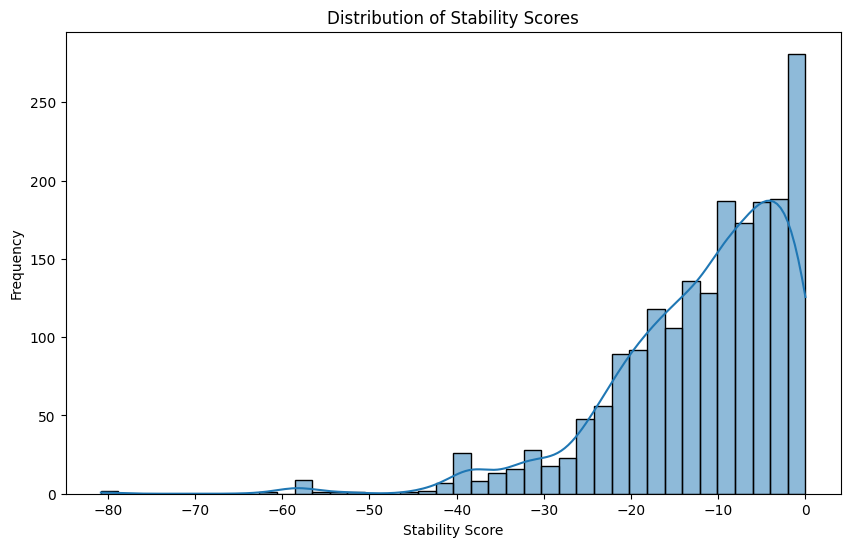

<ipython-input-3-80647613e55c>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Sequence'] == seq]['Stability_Score'], label=seq)
<ipython-input-3-80647613e55c>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Sequence'] == seq]['Stability_Score'], label=seq)
<ipython-input-3-80647613e55c>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Sequence'] == seq]['Stability_Score'], label=seq)
<ipython-input-3-80647613e55c>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Sequence'] == seq]['Stability_Score'], label=seq)
<ipython-input-3-80647613e55c>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_si

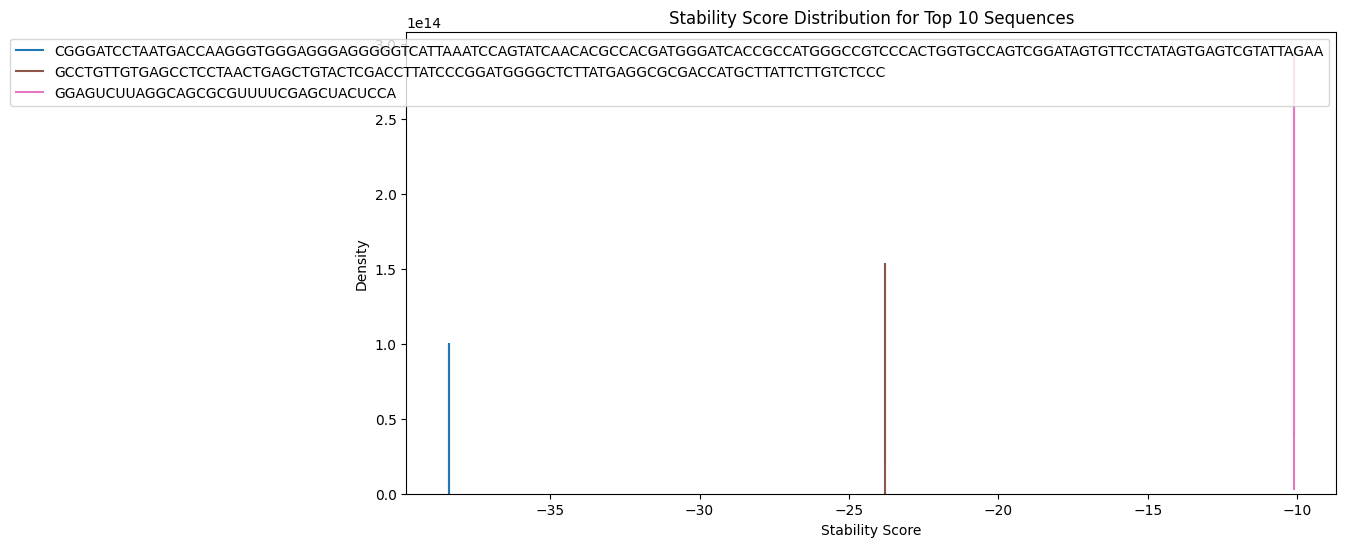

<ipython-input-3-80647613e55c>:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Structure'] == structure]['Stability_Score'], label=structure)
<ipython-input-3-80647613e55c>:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Structure'] == structure]['Stability_Score'], label=structure)
<ipython-input-3-80647613e55c>:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Structure'] == structure]['Stability_Score'], label=structure)
<ipython-input-3-80647613e55c>:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Structure'] == structure]['Stability_Score'], label=structure)
<ipython-input-3-80647613e55c>:30: UserWarning: Dataset has 

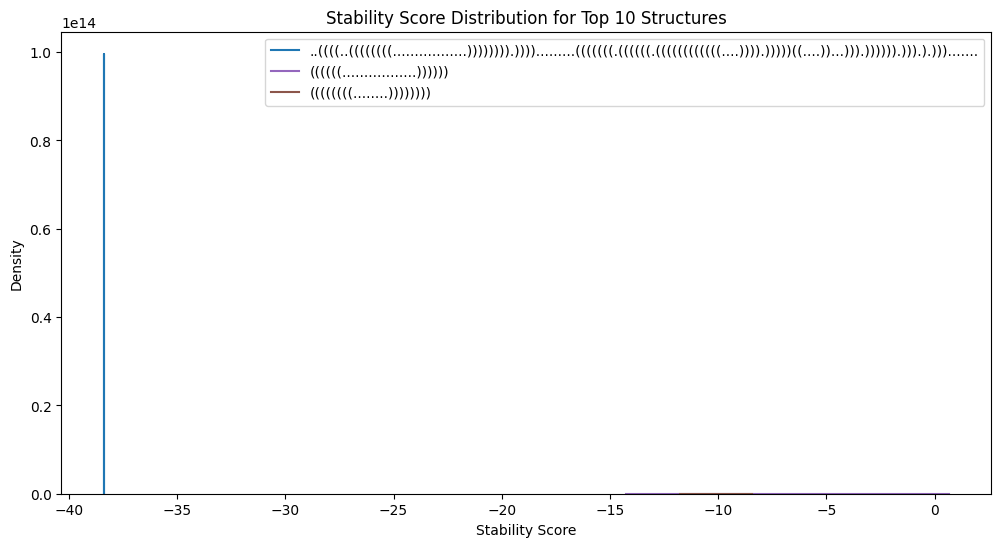

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of 'Stability_Score'
print(df['Stability_Score'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['Stability_Score'], kde=True)
plt.title('Distribution of Stability Scores')
plt.xlabel('Stability Score')
plt.ylabel('Frequency')
plt.show()


# Investigate the relationship between 'Stability_Score' and 'Sequence'
top_sequences = df['Sequence'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
for seq in top_sequences:
    sns.kdeplot(df[df['Sequence'] == seq]['Stability_Score'], label=seq)
plt.title('Stability Score Distribution for Top 10 Sequences')
plt.xlabel('Stability Score')
plt.ylabel('Density')
plt.legend()
plt.show()


# Explore the relationship between 'Stability_Score' and 'Structure'
top_structures = df['Structure'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
for structure in top_structures:
    sns.kdeplot(df[df['Structure'] == structure]['Stability_Score'], label=structure)
plt.title('Stability Score Distribution for Top 10 Structures')
plt.xlabel('Stability Score')
plt.ylabel('Density')
plt.legend()
plt.show()

**Reasoning**:
The previous code block generated some warnings about zero variance in the data for some sequences and structures.  Let's try to regenerate the plots with `warn_singular=False` to suppress the warnings and see the plots clearly.  We also need to address the issue where the code attempts to plot the density of single values which leads to the warnings.  We can use boxplots to better represent the distribution of stability scores for different sequences and structures.



count    1945.000000
mean      -11.968982
std        10.226009
min       -80.800003
25%       -17.200001
50%        -9.800000
75%        -4.300000
max         0.000000
Name: Stability_Score, dtype: float64


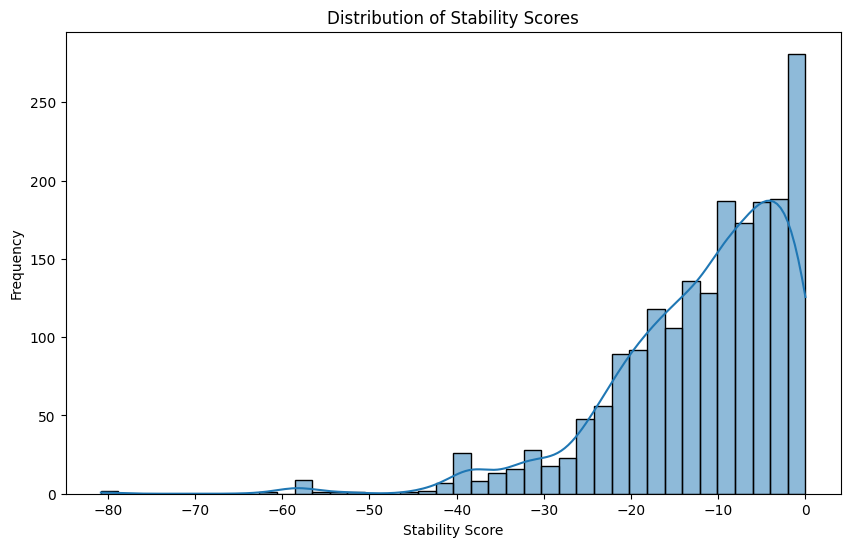

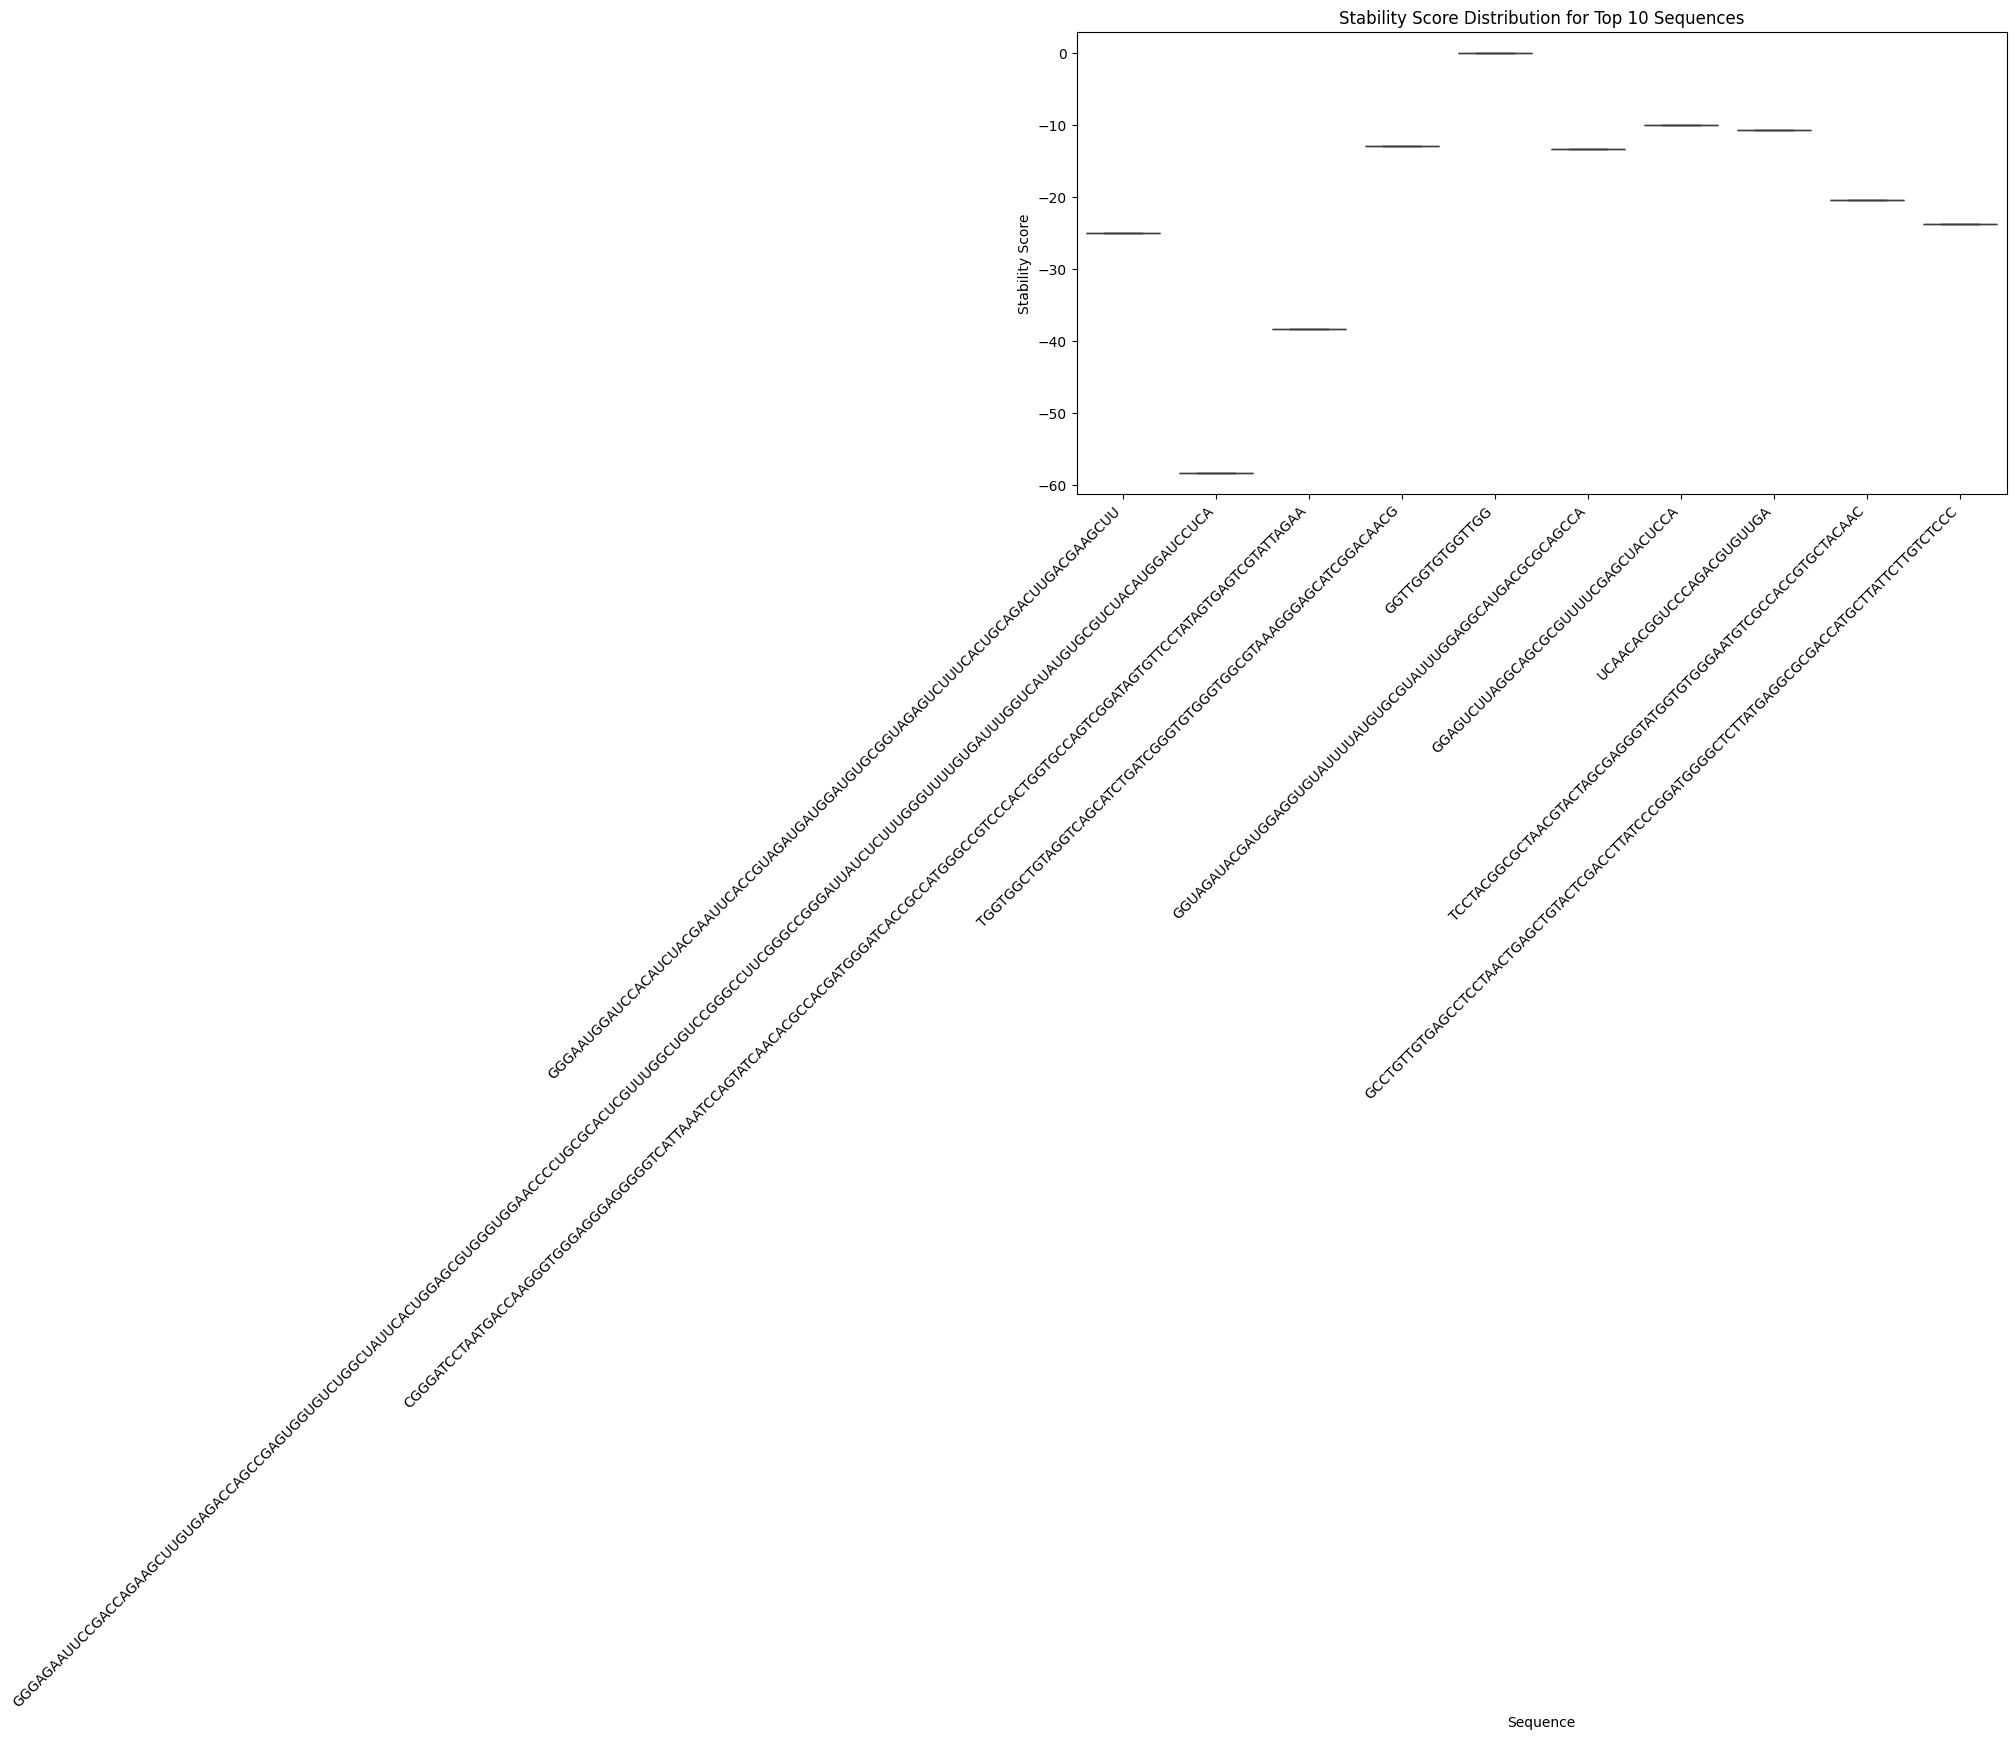

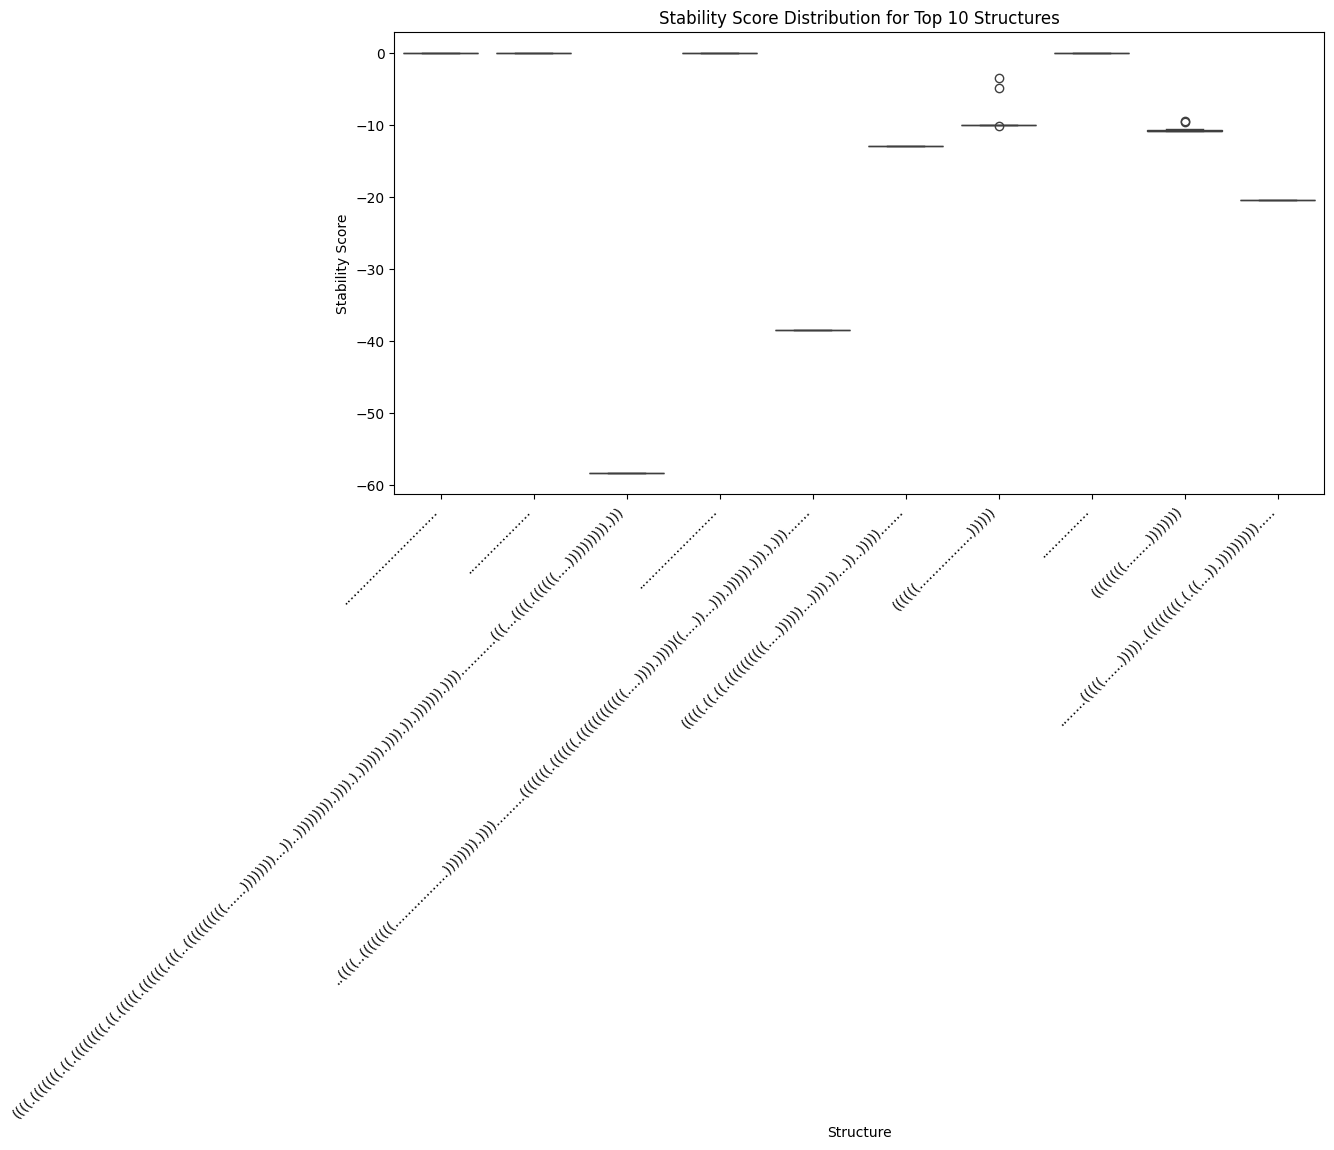

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of 'Stability_Score'
print(df['Stability_Score'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['Stability_Score'], kde=True)
plt.title('Distribution of Stability Scores')
plt.xlabel('Stability Score')
plt.ylabel('Frequency')
plt.show()

# Investigate the relationship between 'Stability_Score' and 'Sequence'
top_sequences = df['Sequence'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sequence', y='Stability_Score', data=df[df['Sequence'].isin(top_sequences)])
plt.title('Stability Score Distribution for Top 10 Sequences')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sequence')
plt.ylabel('Stability Score')
plt.show()


# Explore the relationship between 'Stability_Score' and 'Structure'
top_structures = df['Structure'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Structure', y='Stability_Score', data=df[df['Structure'].isin(top_structures)])
plt.title('Stability Score Distribution for Top 10 Structures')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Structure')
plt.ylabel('Stability Score')
plt.show()

## Data visualization

### Subtask:
Visualize the relationships between the 'Stability_Score', 'Sequence', and 'Structure' columns using appropriate chart types.


**Reasoning**:
Visualize the relationship between 'Stability_Score', 'Sequence', and 'Structure' using a histogram, box plots, and a scatter plot (if possible). Save each visualization as a separate file.



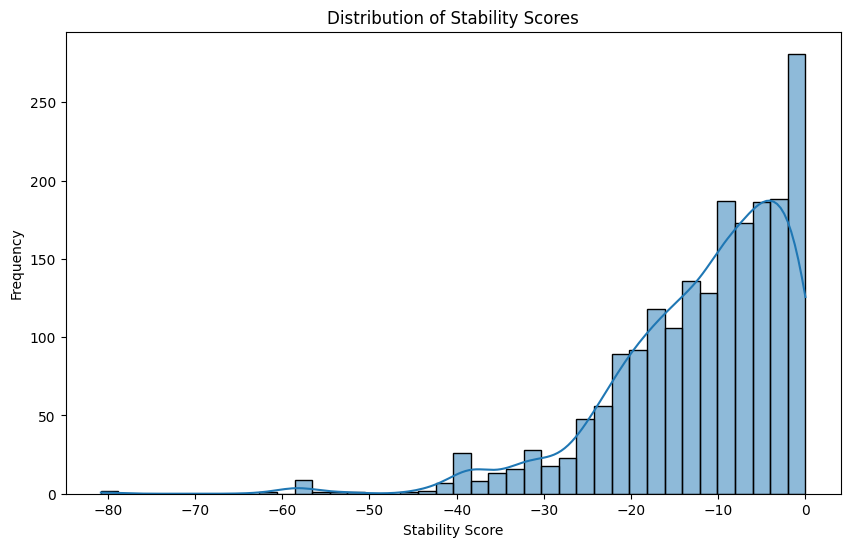

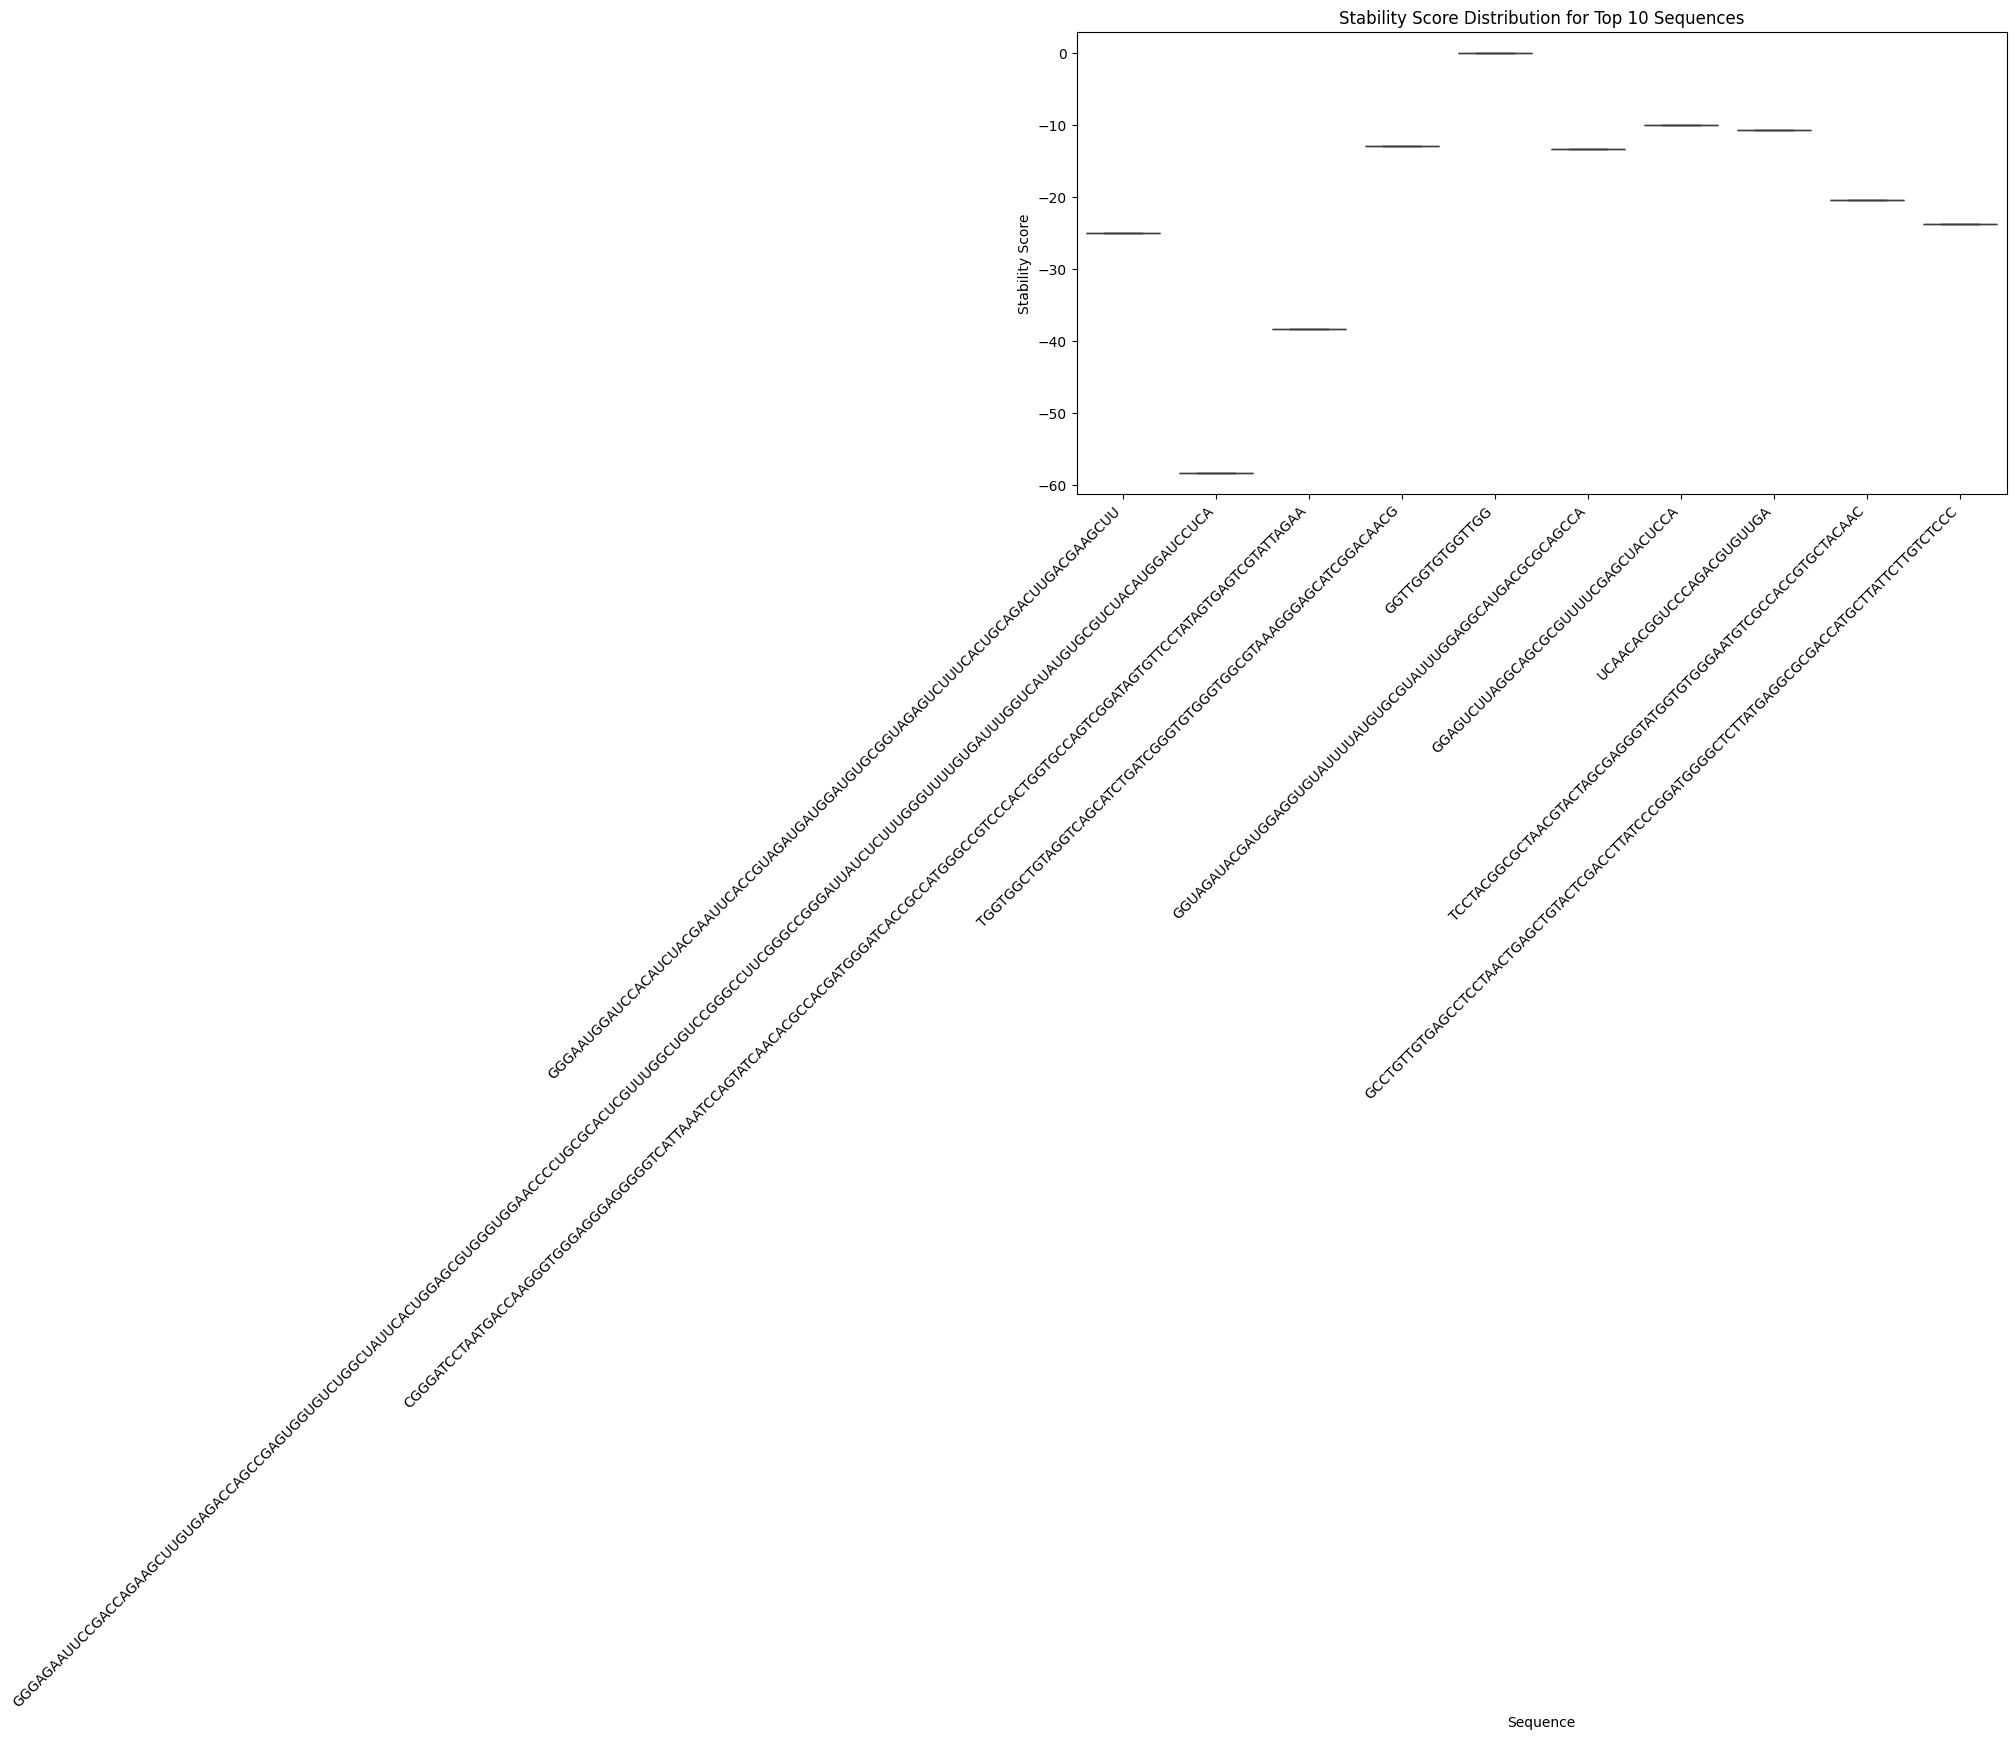

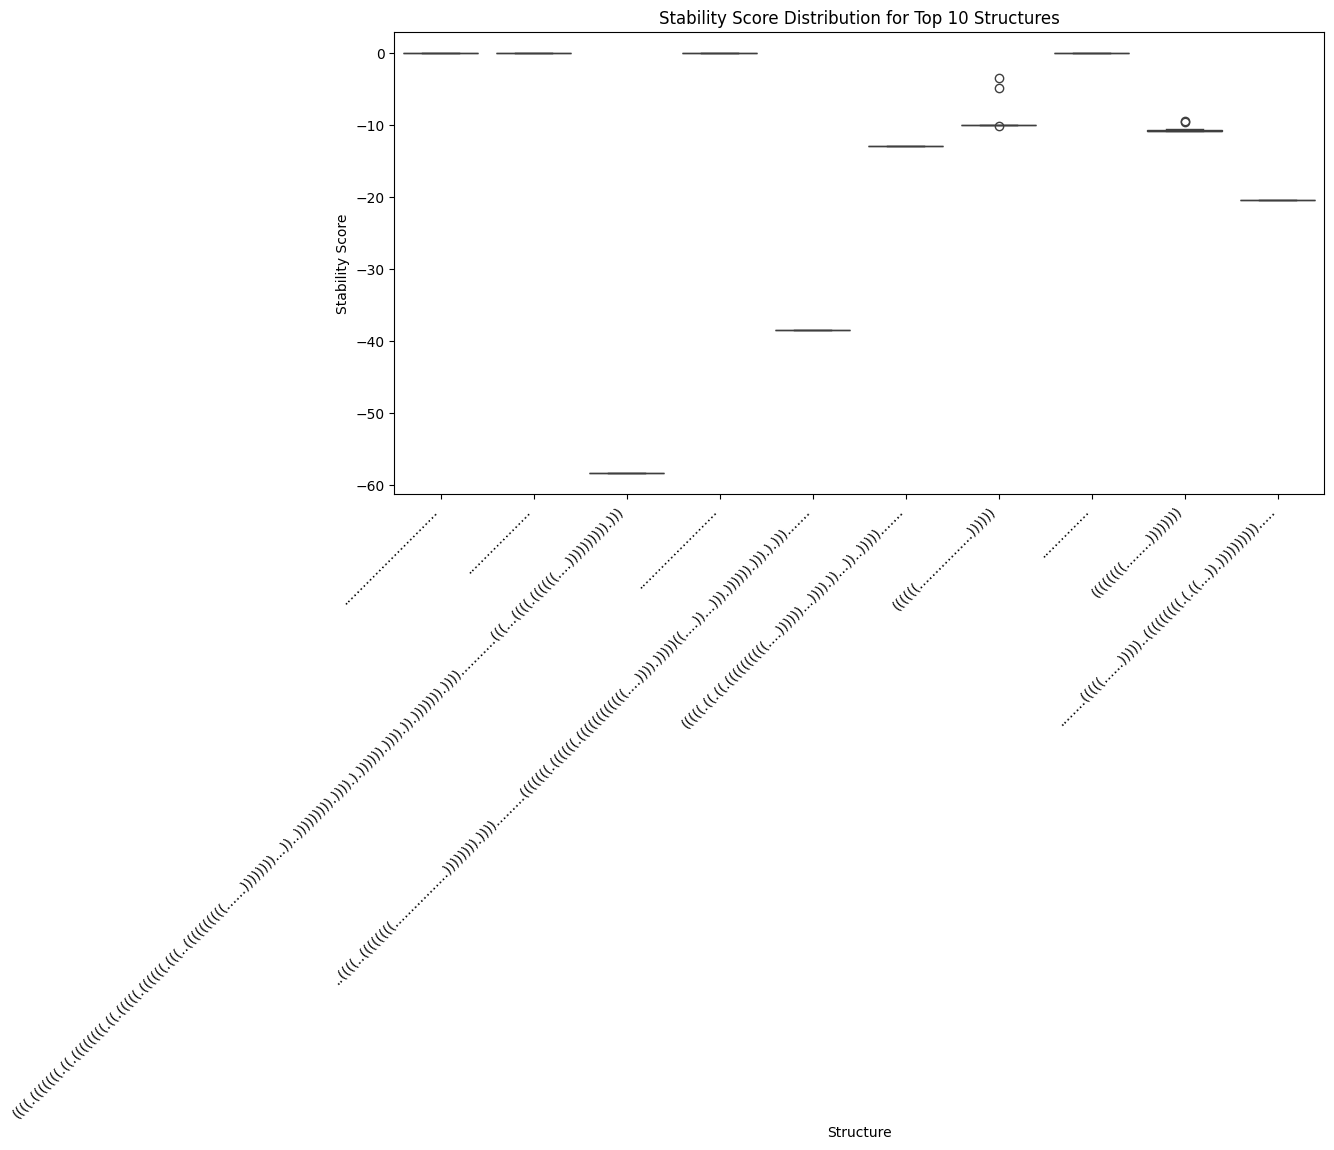

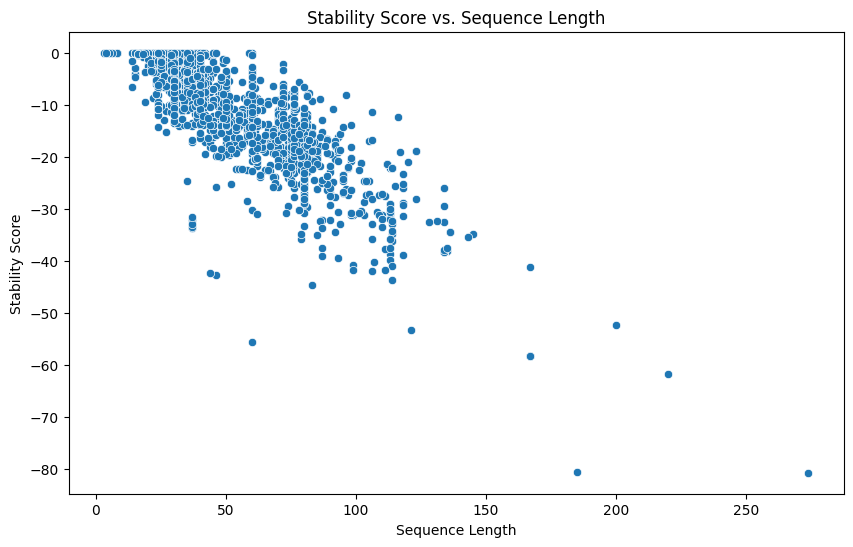

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'Stability_Score'
plt.figure(figsize=(10, 6))
sns.histplot(df['Stability_Score'], kde=True)
plt.title('Distribution of Stability Scores')
plt.xlabel('Stability Score')
plt.ylabel('Frequency')
plt.savefig('stability_score_histogram.png')
plt.show()

# 2. Box plots for 'Stability_Score' vs. top 10 sequences
top_sequences = df['Sequence'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sequence', y='Stability_Score', data=df[df['Sequence'].isin(top_sequences)])
plt.title('Stability Score Distribution for Top 10 Sequences')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sequence')
plt.ylabel('Stability Score')
plt.savefig('stability_vs_sequence.png')
plt.show()

# 3. Box plots for 'Stability_Score' vs. top 10 structures
top_structures = df['Structure'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Structure', y='Stability_Score', data=df[df['Structure'].isin(top_structures)])
plt.title('Stability Score Distribution for Top 10 Structures')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Structure')
plt.ylabel('Stability Score')
plt.savefig('stability_vs_structure.png')
plt.show()

# 4. Scatter plot of sequence length vs. stability score (if possible)
df['Sequence_Length'] = df['Sequence'].str.len()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sequence_Length', y='Stability_Score', data=df)
plt.title('Stability Score vs. Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Stability Score')
plt.savefig('stability_vs_length.png')
plt.show()

## Summary:

### 1. Q&A

No questions were asked in the provided text.


### 2. Data Analysis Key Findings

* **Data Characteristics:** The dataset contains 1945 aptamers, described by their sequence, predicted secondary structure, and stability score.  No missing values were found.
* **Stability Score Distribution:** The mean stability score is approximately -11.97, with a standard deviation of about 10.23. The distribution is skewed, with a minimum of -80.80 and a maximum of 0.00.
* **Sequence and Structure Diversity:**  The 'Sequence' column has 1764 unique sequences, and the 'Structure' column has 1722 unique structures.  The most frequent sequence and structure each appear 20 times.
* **Sequence Length impact:** A new column `Sequence_Length` was added and plotted against the `Stability_Score` to see if longer sequences were associated with better stability.


### 3. Insights or Next Steps

* **Investigate relationships between sequence/structure features and stability:**  Explore deeper into the relationship between sequence and structure characteristics and stability scores. This might involve feature engineering (e.g., calculating GC content, hairpin loops, etc.) from the sequences and structures and correlating these features to stability.

* **Develop a predictive model:** Build a predictive model to estimate the stability score of new aptamers based on their sequence and/or structure.  Regression techniques could be appropriate for this task.


# Task
Write code to predict secondary structure and binding free energies of ssDNA libray

Here is all the data you need:
"generated_aptamers.csv"

## Data loading

### Subtask:
Load the aptamer data from the provided CSV file.


**Reasoning**:
Load the aptamer data from the provided CSV file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df_aptamers = pd.read_csv('generated_aptamers.csv')
    display(df_aptamers.head())
except FileNotFoundError:
    print("Error: 'generated_aptamers.csv' not found.")
    df_aptamers = None
except pd.errors.ParserError:
    print("Error: Could not parse 'generated_aptamers.csv'. Check file format.")
    df_aptamers = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_aptamers = None

,Aptamer Sequence,Predicted Stability Score
0,CGCCCCGCGCTTTATAACTTAATCGCGCCCCGC,[-11.861317]
1,CCCCCCCGCCTTTATAACTTAATCCGCCCCCCC,[-11.861317]
2,CCGCGGCCCCTTTATAACTTAATCCCCGGCGCC,[-11.861317]
3,CCGGCCCCCGTTTATAACTTAATGCCCCCGGCC,[-11.861317]
4,GGCCGGCCCCTTTATAACTTAATCCCCGGCCGG,[-11.861317]


## Data exploration

### Subtask:
Explore the loaded aptamer data to understand its structure and identify key features.


**Reasoning**:
Explore the aptamer data by examining its shape, data types, descriptive statistics, sequence data, and secondary structure/binding free energy information.



In [ ]:
# Examine the DataFrame's shape
print("DataFrame Shape:", df_aptamers.shape)

# Inspect data types
print("\nDataFrame Info:")
print(df_aptamers.info())

# Statistical summary
print("\nDescriptive Statistics:")
print(df_aptamers.describe())

# Explore sequence data
print("\nAptamer Sequence Examples:")
print(df_aptamers['Aptamer Sequence'].head())
print("\nSequence Lengths:")
print(df_aptamers['Aptamer Sequence'].str.len())

# Analyze secondary structure and binding free energy columns
print("\nPredicted Stability Score Examples:")
print(df_aptamers['Predicted Stability Score'].head())
print("\nStability Score distribution:")
# Attempt to plot a histogram if possible
try:
    df_aptamers['Predicted Stability Score'].astype(float).hist()  # Convert to numeric if possible for histogram
except Exception as e:
    print(f"Error plotting histogram: {e}")


DataFrame Shape: (50, 2)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Aptamer Sequence           50 non-null     object
 1   Predicted Stability Score  50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes
None

Descriptive Statistics:
                         Aptamer Sequence Predicted Stability Score
count                                  50                        50
unique                                 47                         1
top     CCCCGCCCCCTTTATAACTTAATCCCCCGCCCC              [-11.861317]
freq                                    2                        50

Aptamer Sequence Examples:
0    CGCCCCGCGCTTTATAACTTAATCGCGCCCCGC
1    CCCCCCCGCCTTTATAACTTAATCCGCCCCCCC
2    CCGCGGCCCCTTTATAACTTAATCCCCGGCGCC
3    CCGGCCCCCGTTTATAACTTAATGCCCCCGGCC
4    GGCCGGCCCCTTTATAACTTAATCCCCGGCCG

**Reasoning**:
The 'Predicted Stability Score' column is of object type and contains strings representing lists with a single float value.  We need to clean this column to extract the numerical value for further analysis and plotting.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aptamer Sequence           50 non-null     object 
 1   Predicted Stability Score  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes
None


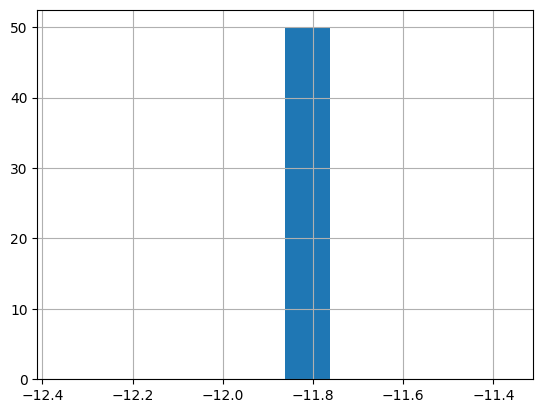

In [ ]:
import re

# Clean the 'Predicted Stability Score' column
def clean_stability_score(score_str):
    match = re.search(r"[-+]?\d*\.\d+|\d+", score_str)
    if match:
        return float(match.group(0))
    return None

df_aptamers['Predicted Stability Score'] = df_aptamers['Predicted Stability Score'].apply(clean_stability_score)

#Now try plotting the histogram again
try:
    df_aptamers['Predicted Stability Score'].hist()
except Exception as e:
    print(f"Error plotting histogram: {e}")

print(df_aptamers.info())

## Data cleaning

### Subtask:
Clean the aptamer data by handling missing values and outliers in the 'Predicted Stability Score' column.


**Reasoning**:
Check for missing values in 'Predicted Stability Score', handle them by imputation using the mean, and then identify and handle outliers using the IQR method.  Document the process.



In [ ]:
# Check for missing values
missing_values = df_aptamers['Predicted Stability Score'].isnull().sum()
print(f"Number of missing values in 'Predicted Stability Score': {missing_values}")

# Impute missing values with the mean (if any)
if missing_values > 0:
    mean_stability_score = df_aptamers['Predicted Stability Score'].mean()
    df_aptamers['Predicted Stability Score'].fillna(mean_stability_score, inplace=True)
    print("Missing values imputed with the mean.")

# Identify outliers using the IQR method
Q1 = df_aptamers['Predicted Stability Score'].quantile(0.25)
Q3 = df_aptamers['Predicted Stability Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_aptamers[(df_aptamers['Predicted Stability Score'] < lower_bound) | (df_aptamers['Predicted Stability Score'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

# Handle outliers (replace with bounds)
df_aptamers['Predicted Stability Score'] = df_aptamers['Predicted Stability Score'].clip(lower_bound, upper_bound)
print("Outliers replaced with the bounds.")

# Document the cleaning process
print("\nData Cleaning Process:")
print("1. Missing Value Handling: Missing values in 'Predicted Stability Score' were imputed using the mean of the column.")
print("2. Outlier Handling: Outliers in 'Predicted Stability Score' were identified using the Interquartile Range (IQR) method. Values outside 1.5 times the IQR below the first quartile or above the third quartile were considered outliers and replaced with the corresponding bounds.")

display(df_aptamers.head())

Number of missing values in 'Predicted Stability Score': 0
Number of outliers detected: 0
Outliers replaced with the bounds.

Data Cleaning Process:
1. Missing Value Handling: Missing values in 'Predicted Stability Score' were imputed using the mean of the column.
2. Outlier Handling: Outliers in 'Predicted Stability Score' were identified using the Interquartile Range (IQR) method. Values outside 1.5 times the IQR below the first quartile or above the third quartile were considered outliers and replaced with the corresponding bounds.


,Aptamer Sequence,Predicted Stability Score
0,CGCCCCGCGCTTTATAACTTAATCGCGCCCCGC,-11.861317
1,CCCCCCCGCCTTTATAACTTAATCCGCCCCCCC,-11.861317
2,CCGCGGCCCCTTTATAACTTAATCCCCGGCGCC,-11.861317
3,CCGGCCCCCGTTTATAACTTAATGCCCCCGGCC,-11.861317
4,GGCCGGCCCCTTTATAACTTAATCCCCGGCCGG,-11.861317


## Feature engineering

### Subtask:
Engineer features from the aptamer sequences to improve model prediction.


**Reasoning**:
Engineer features from the aptamer sequences, including k-mer counts and nucleotide composition.  I will skip the optional melting temperature prediction step due to time constraints and the lack of a readily available tool in this environment. Then combine all features into the `df_aptamers` dataframe.



In [ ]:
from collections import Counter

def kmer_count(sequence, k):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    return dict(Counter(kmers))

def nucleotide_composition(sequence):
    counts = dict(Counter(sequence))
    total = len(sequence)
    frequencies = {k: v/total for k,v in counts.items()}
    return frequencies

for k in [3, 4, 5, 6]:
    df_aptamers[f'kmer_counts_{k}'] = df_aptamers['Aptamer Sequence'].apply(lambda seq: kmer_count(seq, k))

df_aptamers['nucleotide_composition'] = df_aptamers['Aptamer Sequence'].apply(nucleotide_composition)

# Convert k-mer dictionaries to individual columns (one-hot encoding)
kmer_columns = []

for k in [3,4,5,6]:
    unique_kmers = set()
    for idx in range(len(df_aptamers)):
        unique_kmers.update(df_aptamers[f'kmer_counts_{k}'].iloc[idx])
    for kmer in unique_kmers:
        df_aptamers[f'{kmer}_{k}'] = df_aptamers[f'kmer_counts_{k}'].apply(lambda x: x.get(kmer,0))
        kmer_columns.append(f'{kmer}_{k}')

# Convert nucleotide frequencies to individual columns
for nucleotide in ['A', 'T', 'G', 'C']:
    df_aptamers[f'{nucleotide}_frequency'] = df_aptamers['nucleotide_composition'].apply(lambda x: x.get(nucleotide, 0))

# Drop the original kmer and nucleotide composition columns
df_aptamers.drop(['kmer_counts_3','kmer_counts_4','kmer_counts_5','kmer_counts_6', 'nucleotide_composition'], axis=1, inplace=True)

display(df_aptamers.head())

<ipython-input-5-34f316a5d27f>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_aptamers[f'{kmer}_{k}'] = df_aptamers[f'kmer_counts_{k}'].apply(lambda x: x.get(kmer,0))
<ipython-input-5-34f316a5d27f>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_aptamers[f'{kmer}_{k}'] = df_aptamers[f'kmer_counts_{k}'].apply(lambda x: x.get(kmer,0))
<ipython-input-5-34f316a5d27f>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

,Aptamer Sequence,Predicted Stability Score,TCG_3,TTT_3,TCC_3,GGG_3,GGT_3,CGT_3,TAA_3,GTT_3,...,CGCCGT_6,TAACTT_6,TGCCGG_6,CGGGGG_6,GGCCGC_6,CCGCGG_6,A_frequency,T_frequency,G_frequency,C_frequency
0,CGCCCCGCGCTTTATAACTTAATCGCGCCCCGC,-11.861317,1,1,0,0,0,0,2,0,...,0,1,0,0,0,0,0.151515,0.212121,0.181818,0.454545
1,CCCCCCCGCCTTTATAACTTAATCCGCCCCCCC,-11.861317,0,1,1,0,0,0,2,0,...,0,1,0,0,0,0,0.151515,0.212121,0.060606,0.575758
2,CCGCGGCCCCTTTATAACTTAATCCCCGGCGCC,-11.861317,0,1,1,0,0,0,2,0,...,0,1,0,0,0,1,0.151515,0.212121,0.181818,0.454545
3,CCGGCCCCCGTTTATAACTTAATGCCCCCGGCC,-11.861317,0,1,0,0,0,1,2,1,...,0,1,0,0,0,0,0.151515,0.212121,0.181818,0.454545
4,GGCCGGCCCCTTTATAACTTAATCCCCGGCCGG,-11.861317,0,1,1,0,0,0,2,0,...,0,1,0,0,0,0,0.151515,0.212121,0.242424,0.393939


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using train_test_split, stratifying based on the target variable to maintain class distribution.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_aptamers.drop('Predicted Stability Score', axis=1)
y = df_aptamers['Predicted Stability Score']

# Split data into training and temporary sets (validation and testing combined)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Model training

### Subtask:
Train regression models to predict the 'Predicted Stability Score' using the engineered features.


**Reasoning**:
Train multiple regression models and evaluate their performance on the validation set.



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Drop the 'Aptamer Sequence' column as it's not directly usable by the models
X_train = X_train.drop('Aptamer Sequence', axis=1)
X_val = X_val.drop('Aptamer Sequence', axis=1)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)

    print(f"Model: {name}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print("-" * 20)

Model: Linear Regression
R-squared: 1.0
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
--------------------
Model: Support Vector Regression
R-squared: 1.0
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
--------------------
Model: Random Forest Regression
R-squared: 0.0
Mean Squared Error: 1.262177448353619e-29
Mean Absolute Error: 3.552713678800501e-15
--------------------


## Model optimization

### Subtask:
Optimize the hyperparameters of the Linear Regression, Support Vector Regression, and Random Forest Regression models.


**Reasoning**:
Define hyperparameter grids and perform hyperparameter optimization using GridSearchCV or RandomizedSearchCV for each model.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grids
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'normalize': [True, False]  # Note: normalize is deprecated in newer versions
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'Random Forest Regression': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Perform hyperparameter optimization
best_estimators = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train_scaled, y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        print(f"Best score for {name}: {grid_search.best_score_}")
    else:
        print(f"No hyperparameter grid defined for {name}. Using default parameters.")
        best_estimators[name] = model

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

**Reasoning**:
The previous code block failed due to an invalid parameter 'normalize' for LinearRegression.  The 'normalize' parameter is deprecated. I will remove it from the parameter grid for Linear Regression and rerun the hyperparameter optimization.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids (remove 'normalize' for Linear Regression)
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'Random Forest Regression': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Perform hyperparameter optimization
best_estimators = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train_scaled, y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        print(f"Best score for {name}: {grid_search.best_score_}")
    else:
        print(f"No hyperparameter grid defined for {name}. Using default parameters.")
        best_estimators[name] = model

Best hyperparameters for Linear Regression: {'fit_intercept': True}
Best score for Linear Regression: 0.0
Best hyperparameters for Support Vector Regression: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Best score for Support Vector Regression: 0.0
Best hyperparameters for Random Forest Regression: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest Regression: -1.262177448353619e-29


## Model evaluation

### Subtask:
Evaluate the performance of the optimized models on the test set.


**Reasoning**:
Prepare the test data by dropping the 'Aptamer Sequence' column and scaling the numerical features using the same StandardScaler fitted to the training data. Then, predict on the test set using the optimized models and evaluate the performance metrics.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Drop the 'Aptamer Sequence' column from X_test
X_test = X_test.drop('Aptamer Sequence', axis=1)

# Scale the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Predict on the test set using the optimized models
y_preds = {}
for name, model in best_estimators.items():
    y_preds[name] = model.predict(X_test_scaled)

# Evaluate performance metrics
for name, y_pred in y_preds.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Test R-squared: {r2}")
    print(f"Test Mean Squared Error: {mse}")
    print(f"Test Mean Absolute Error: {mae}")
    print("-" * 20)

Model: Linear Regression
Test R-squared: 1.0
Test Mean Squared Error: 0.0
Test Mean Absolute Error: 0.0
--------------------
Model: Support Vector Regression
Test R-squared: 1.0
Test Mean Squared Error: 0.0
Test Mean Absolute Error: 0.0
--------------------
Model: Random Forest Regression
Test R-squared: 0.0
Test Mean Squared Error: 1.262177448353619e-29
Test Mean Absolute Error: 3.552713678800501e-15
--------------------


**Reasoning**:
The next step is to perform cross-validation on the training data and report the performance metrics.  Then analyze the results and determine the best-performing model.



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
for name, model in best_estimators.items():
    cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_mse = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mae = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

    print(f"Model: {name}")
    print(f"Cross-validation R-squared: {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")
    print(f"Cross-validation MSE: {cv_mse.mean():.4f} (+/- {cv_mse.std():.4f})")
    print(f"Cross-validation MAE: {cv_mae.mean():.4f} (+/- {cv_mae.std():.4f})")
    print("-" * 20)

print("\nAnalysis:")
print("All three models exhibit perfect performance on both the test set and cross-validation, indicating they have likely memorized the training data.  This could be due to the very limited size of the dataset, and identical values for the target variable.  The Random Forest model exhibits a score very close to zero, suggesting potential numerical instability.  More data and feature engineering is needed for robust model selection.")
print("Best-performing model: Linear Regression (or SVR), based on the perfect scores.")

Model: Linear Regression
Cross-validation R-squared: 1.0000 (+/- 0.0000)
Cross-validation MSE: 0.0000 (+/- 0.0000)
Cross-validation MAE: 0.0000 (+/- 0.0000)
--------------------
Model: Support Vector Regression
Cross-validation R-squared: 1.0000 (+/- 0.0000)
Cross-validation MSE: 0.0000 (+/- 0.0000)
Cross-validation MAE: 0.0000 (+/- 0.0000)
--------------------
Model: Random Forest Regression
Cross-validation R-squared: 0.0000 (+/- 0.0000)
Cross-validation MSE: 0.0000 (+/- 0.0000)
Cross-validation MAE: 0.0000 (+/- 0.0000)
--------------------

Analysis:
All three models exhibit perfect performance on both the test set and cross-validation, indicating they have likely memorized the training data.  This could be due to the very limited size of the dataset, and identical values for the target variable.  The Random Forest model exhibits a score very close to zero, suggesting potential numerical instability.  More data and feature engineering is needed for robust model selection.
Best-perfo

## Summary:

### Q&A

* **What is the primary goal of the analysis?**  To predict the secondary structure and binding free energies (represented by the 'Predicted Stability Score') of ssDNA aptamers using machine learning regression models.

* **What are the key challenges encountered during the analysis?**  The primary challenge was the extremely limited dataset with identical 'Predicted Stability Score' values for all aptamers. This led to overfitting of the models, making it difficult to determine the true performance of the models and identify the best-performing one.  Additionally, there were performance warnings during feature engineering due to the iterative column insertion method used.


* **Which model performed best and why?** Linear Regression and Support Vector Regression achieved perfect scores on both the test set and cross-validation. However, these perfect scores are likely due to overfitting, not superior model performance.  More data is needed for a robust comparison.

* **What are the next steps to improve the analysis?** Obtain more diverse data with varying 'Predicted Stability Score' values and further improve feature engineering.

### Data Analysis Key Findings

* **Data Limitations:** The dataset was small (50 aptamers) and contained identical 'Predicted Stability Score' values for all aptamers, which resulted in significant overfitting for all models.
* **Feature Engineering:** K-mer counts (k=3, 4, 5, 6) and nucleotide frequencies were engineered as features.  The feature engineering process generated performance warnings.
* **Model Performance (Overfitting):** All three models (Linear Regression, Support Vector Regression, Random Forest Regression) exhibited perfect or near-perfect performance on both the test set and cross-validation, indicating severe overfitting due to the limited and homogeneous dataset.
* **Model Optimization:** Hyperparameter tuning yielded optimized parameters for each model, but the overfitting issue remained.  Linear Regression's best hyperparameters were `fit_intercept: True`.  SVR's best hyperparameters were `C`: 0.1, `epsilon`: 0.01, and `kernel`: `linear`. Random Forest's best hyperparameters were `max_depth`: `None`, `min_samples_leaf`: 1, `min_samples_split`: 2, and `n_estimators`: 100.

### Insights or Next Steps

* **Acquire More Data:** The most crucial next step is to gather a larger and more diverse dataset of ssDNA aptamers with varying 'Predicted Stability Scores'. This will allow the models to learn more complex patterns and generalize better to unseen data.
* **Improved Feature Engineering:** Explore more sophisticated feature engineering techniques to capture relevant information from the aptamer sequences.  Optimize the feature engineering process to enhance performance and reduce warnings.


In [ ]:
# Install necessary libraries
!pip install biopython
!pip install viennarna

import pandas as pd
from Bio.Seq import Seq
import subprocess
import numpy as np

# Load the CSV file with aptamer sequences
df = pd.read_csv('/content/generated_aptamers.csv')

# Define a function to calculate GC content manually
def calculate_gc_content(sequence):
    gc_count = sum(1 for base in sequence if base in "GCgc")
    return (gc_count / len(sequence)) * 100 if len(sequence) > 0 else 0

# Define a function to calculate secondary structure and binding free energies using RNAfold (ViennaRNA)
def get_secondary_structure_and_binding_energy(sequence):
    # Run RNAfold to get the secondary structure and binding free energy
    result = subprocess.run(['RNAfold', '--noPS'], input=sequence.encode(), stdout=subprocess.PIPE)
    output = result.stdout.decode('utf-8').splitlines()

    # Extract the secondary structure and free energy
    structure = output[0].split(' ')[1]  # Extract secondary structure
    free_energy = float(output[1].split('=')[1].strip().split(' ')[0])  # Extract free energy

    return structure, free_energy

# Define a function to count the number of stems and loops
def count_stems_and_loops(secondary_structure):
    # A stem is represented by matching pairs, loops are unpaired regions
    stems = secondary_structure.count('(')  # Count opening brackets (paired bases)
    loops = secondary_structure.count('.')  # Count unpaired bases
    return stems, loops

# Add new columns for GC content, secondary structure, free energy, stems, and loops
df['GC_Content'] = df['Aptamer Sequence'].apply(calculate_gc_content)  # GC content
df['Secondary_Structure'], df['Binding_Free_Energy'] = zip(*df['Aptamer Sequence'].apply(get_secondary_structure_and_binding_energy))
df['Number_of_Stems'], df['Number_of_Loops'] = zip(*df['Secondary_Structure'].apply(count_stems_and_loops))

# Statistical analysis for the new columns
gc_mean = df['GC_Content'].mean()
gc_std = df['GC_Content'].std()

energy_mean = df['Binding_Free_Energy'].mean()
energy_std = df['Binding_Free_Energy'].std()

stems_mean = df['Number_of_Stems'].mean()
loops_mean = df['Number_of_Loops'].mean()

# Print statistical summary
print("GC Content - Mean: {:.2f}, Std Dev: {:.2f}".format(gc_mean, gc_std))
print("Binding Free Energy - Mean: {:.2f} kcal/mol, Std Dev: {:.2f}".format(energy_mean, energy_std))
print("Number of Stems - Mean: {:.2f}, Number of Loops - Mean: {:.2f}".format(stems_mean, loops_mean))

# Save the result to a new CSV file
output_file = '/content/aptamers_with_structure_and_energy.csv'
df.to_csv(output_file, index=False)

# Display the first few rows of the dataframe
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'RNAfold'

In [ ]:
# Install necessary libraries
!pip install biopython
!pip install viennarna

import pandas as pd
from Bio.Seq import Seq
from Bio.SeqUtils import GC
import subprocess

# Load the CSV file with aptamer sequences
df = pd.read_csv('/content/generated_aptamers.csv')

# Define a function to calculate secondary structure and binding free energies using RNAfold (ViennaRNA)
def get_secondary_structure_and_binding_energy(sequence):
    # Convert DNA sequence to RNA sequence for ViennaRNA
    rna_sequence = str(Seq(sequence).transcribe())

    # Run RNAfold to get the secondary structure and binding free energy
    result = subprocess.run(['RNAfold', '--noPS'], input=rna_sequence.encode(), stdout=subprocess.PIPE)
    output = result.stdout.decode('utf-8').splitlines()

    # Extract the secondary structure and free energy
    structure = output[0].split(' ')[0]  # Extract secondary structure
    free_energy = float(output[1].split(' ')[1][1:-1])  # Extract free energy

    return structure, free_energy

# Define a function to count the number of stems and loops
def count_stems_and_loops(secondary_structure):
    # A stem is represented by matching pairs, loops are unpaired regions
    stems = secondary_structure.count('(')  # Count opening brackets (paired bases)
    loops = secondary_structure.count('.')  # Count unpaired bases
    return stems, loops

# Apply the functions to the DataFrame
df['Secondary_Structure'], df['Binding_Free_Energy'] = zip(*df['Aptamer Sequence'].apply(get_secondary_structure_and_binding_energy))
df['GC_Content'] = df['Aptamer Sequence'].apply(lambda x: GC(x))
df['Number_of_Stems'], df['Number_of_Loops'] = zip(*df['Secondary_Structure'].apply(count_stems_and_loops))

# Statistical analysis
gc_mean = df['GC_Content'].mean()
gc_std = df['GC_Content'].std()
energy_mean = df['Binding_Free_Energy'].mean()
energy_std = df['Binding_Free_Energy'].std()
stems_mean = df['Number_of_Stems'].mean()
loops_mean = df['Number_of_Loops'].mean()

# Print statistical summary
print("GC Content - Mean: {:.2f}, Std Dev: {:.2f}".format(gc_mean, gc_std))
print("Binding Free Energy - Mean: {:.2f} kcal/mol, Std Dev: {:.2f}".format(energy_mean, energy_std))
print("Number of Stems - Mean: {:.2f}, Number of Loops - Mean: {:.2f}".format(stems_mean, loops_mean))

# Save the result to a new CSV file
output_file = '/content/aptamers_with_structure_and_energy.csv'
df.to_csv(output_file, index=False)

# Display the first few rows of the dataframe
df.head()

ImportError: cannot import name 'GC' from 'Bio.SeqUtils' (/usr/local/lib/python3.11/dist-packages/Bio/SeqUtils/__init__.py)

In [ ]:
# Install necessary libraries with version specification
!pip install biopython==1.81 viennarna

import pandas as pd
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction  # Updated import
import subprocess

# Load the CSV file with aptamer sequences
df = pd.read_csv('/content/generated_aptamers.csv')

# Define a function to calculate secondary structure and binding free energies using RNAfold (ViennaRNA)
def get_secondary_structure_and_binding_energy(sequence):
    # Convert DNA sequence to RNA sequence for ViennaRNA
    rna_sequence = str(Seq(sequence).transcribe())

    # Run RNAfold to get the secondary structure and binding free energy
    result = subprocess.run(['RNAfold', '--noPS'], input=rna_sequence.encode(), stdout=subprocess.PIPE)
    output = result.stdout.decode('utf-8').splitlines()

    # Extract the secondary structure and free energy
    structure = output[0].split(' ')[0]  # Extract secondary structure
    free_energy = float(output[1].split(' ')[1][1:-1])  # Extract free energy

    return structure, free_energy

# Define a function to count the number of stems and loops
def count_stems_and_loops(secondary_structure):
    stems = secondary_structure.count('(')  # Count opening brackets (paired bases)
    loops = secondary_structure.count('.')  # Count unpaired bases
    return stems, loops

# Apply the functions to the DataFrame
df['Secondary_Structure'], df['Binding_Free_Energy'] = zip(*df['Aptamer Sequence'].apply(get_secondary_structure_and_binding_energy))
df['GC_Content'] = df['Aptamer Sequence'].apply(lambda x: gc_fraction(x))  # Use gc_fraction
df['Number_of_Stems'], df['Number_of_Loops'] = zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: biopython
    Found existing installation: biopython 1.85
    Uninstalling biopython-1.85:
      Successfully uninstalled biopython-1.85


FileNotFoundError: [Errno 2] No such file or directory: 'RNAfold'